In [1]:
import pylearn2.utils
import pylearn2.config
import theano
import neukrill_net.dense_dataset
import neukrill_net.utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import holoviews as hl
%load_ext holoviews.ipython
import sklearn.metrics

Using gpu device 3: Tesla K40c
:0: FutureWarning: IPython widgets are experimental and may change in the future.


Welcome to the HoloViews IPython extension! (http://ioam.github.io/holoviews/)
Available magics: %compositor, %opts, %params, %view, %%labels, %%opts, %%view


In [2]:
def make_curves(model, *args):
    curves = None
    for c in args:
        channel = m.monitor.channels[c]
        c = c[0].upper() + c[1:]
        if not curves:
            curves = hl.Curve(zip(channel.epoch_record, channel.val_record),group=c)
        else:
            curves += hl.Curve(zip(channel.epoch_record, channel.val_record),group=c)
    return curves

In [3]:
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/opencv_integrated_v3_reg_ranged_recent.pkl")

Valid_objective
      I : Curve.Valid_objective   (y)
   Valid_y_nll    
      I : Curve.Valid_y_nll   (y)
   Train_y_nll    
      I : Curve.Train_y_nll   (y)
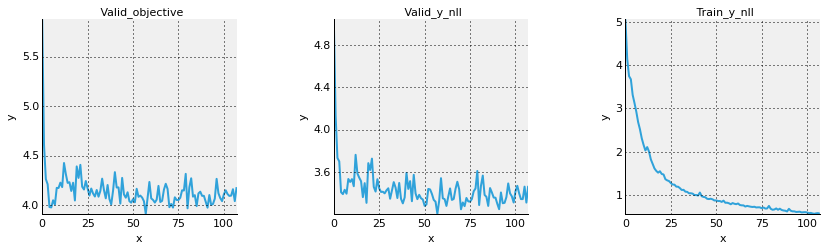

In [4]:
make_curves(m,"valid_objective","valid_y_nll","train_y_nll")

The `train_y_nll`, `valid_y_nll` and `valid_objective` show massive overfitting.

In [26]:
m.layer_names

{'h5', 'h6', 'parallel', 'y'}

Curve.Curve.valid_y_nll   (y)
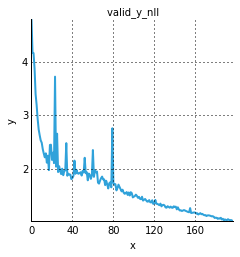

In [70]:
channel = m.monitor.channels["valid_y_nll"]
hl.Curve(zip(channel.epoch_record, channel.val_record),label="valid_y_nll")

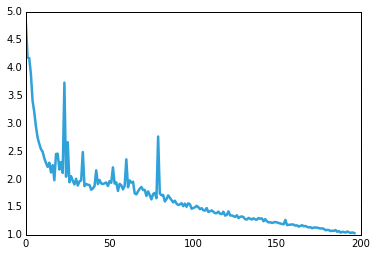

In [71]:
channel = m.monitor.channels["valid_y_nll"]
plt.plot(channel.epoch_record, channel.val_record)

Hard to see whether it is still learning...

Curve.Curve.valid_y_nll   (y)
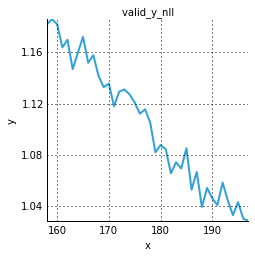

In [72]:
ch1 = m.monitor.channels["valid_y_nll"]
ch2 = m.monitor.channels["train_y_nll"]
hl.Curve(zip(ch1.epoch_record[-40:], ch1.val_record[-40:]),label="valid_y_nll")

Curve.Curve.train_y_nll   (y)
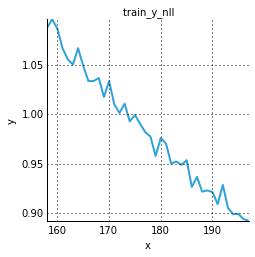

In [73]:
hl.Curve(zip(ch2.epoch_record[-40:], ch2.val_record[-40:]),label="train_y_nll")

In [74]:
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/continue_hopeful_recent.pkl")

Valid_objective
      I : Curve.Valid_objective   (y)
   Valid_y_nll    
      I : Curve.Valid_y_nll   (y)
   Train_y_nll    
      I : Curve.Train_y_nll   (y)
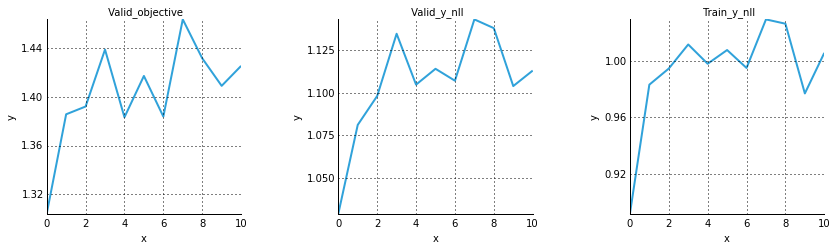

In [75]:
make_curves(m,"valid_objective","valid_y_nll","train_y_nll")